<a href="https://colab.research.google.com/github/singhalarushi06/ai4all-group2A/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* make sure to add feature importance code and missing vales and all that


In [ ]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
# Create Symptom Targets from the Text


unique_categories = df['Disease_Class'].unique()
print(unique_categories)


def create_symptom_targets(df):
  df_symptoms=df.copy() # to add new columns too
  df_symptoms['Disease_Class']=df_symptoms['Disease_Class'].astype(str) # all symptom text is treated as strings

  # Look for keywords in symptom text and classify as yes or no

  #---Bleeding----

  df_symptoms['Symptom_Bleeding']=df_symptoms['Disease_Class'].str.contains("blood",case=False).astype(int) # if string contains "blood" case doesn't matter,  if true 1 false 0

  # --- Cramps ----
  df_symptoms['Symptom_Abdominal_Pain']=df_symptoms['Disease_Class'].str.contains("cramps|pain",case=False).astype(int)

  # --- Bowel Problem ----
  df_symptoms['Symptom_Bowel_Problems']=df_symptoms['Disease_Class'].str.contains("diarrhea|constipation",case=False).astype(int)

  # --- Bloating ----
  df_symptoms['Symptom_Bloating']=df_symptoms['Disease_Class'].str.contains("bloating",case=False).astype(int)

  # --- Systematic Symptoms----
  df_symptoms['Symptom_Systematic']=df_symptoms['Disease_Class'].str.contains("loss|nausea|vomiting",case=False).astype(int)

  return df_symptoms






['Unexplained weight loss' 'Blood in stool' 'Nausea or vomiting'
 'Bloating' 'Abdominal cramps or pain' 'Diarrhea or constipation']


In [ ]:
# Prepare Features for Modeling

# ---- top 8 importat features from random forest -----

top_features=[
    "CRP_ESR","Fecal_Calprotectin","BMI","Age","Genetic_Markers","Stress_Level","Physical_Activity","Bowel_Movement_Frequency"
]

X = df_symptoms[top_features] # Input
scaler = StandardScaler() # Makes all features have same scale mea=0,std=1
X_scaled=scaler.fit_transform(X) # learns the scaling from the training data and applies it (important so no single features dominates just bc it has larger numbers )


# -----Train Model for each symptom------

symptoms_cols=[]

for col in df_symptoms.columns:
  if col.startswith("Symptom_") and col!='Symptom_Burden_Score': # get all symptom coloumns that we just created except symptom_burdern(from orginal df)
    symptoms_cols.append(col)

for symptom in symptoms_cols:
  y=df_symptoms[symptom] # Our target variable what we are trying to predict

  #Split data
  X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

  #print(symptom, y.unique())


  # -------Use Random Forest Classifer ------

  model = RandomForestClassifier(
    n_estimators= 100,   # numbers of trees
    max_depth=10,     # how deep trees can grow
    class_weight='balanced', # handles immbalnced data (important when one class is rare)
    random_state=42 # make sure results are reproducible evry time (42 is the seed #)
  )

  model.fit(X_train,y_train)

  # ------Evaluate Model Performance-------

  y_pred=model.predict(X_test) # yes or no predictions
  y_pred_proba=model.predict_proba(X_test)[:,1] # Probability scores

  accuracy= accuracy_score(y_test,y_pred)
  auc_score=roc_auc_score(y_test,y_pred_proba) # how well model separates yes vs no

  print(symptom)
  print("-------------")
  print(f"Accuracy: {accuracy:.3f}")
  print(f"AUC Score: {auc_score:.3f}")
  print(f"Prevalence: {y.mean():.1%}")
  print()





Symptom_Bleeding
-------------
Accuracy: 0.768
AUC Score: 0.510
Prevalence: 17.0%

Symptom_Pain
-------------
Accuracy: 0.736
AUC Score: 0.500
Prevalence: 17.2%

Symptom_Bowel_Changes
-------------
Accuracy: 0.748
AUC Score: 0.499
Prevalence: 16.3%

Symptom_Systemic
-------------
Accuracy: 0.756
AUC Score: 0.492
Prevalence: 16.5%

Symptom_Bloating
-------------
Accuracy: 0.756
AUC Score: 0.499
Prevalence: 16.2%



In [ ]:
 #Create Prediction Function for New Patients

def predict_symptoms(patient_data,symptom_models):
  results={}

  for symptom,model_info in symptom_models.items():
    patient_df=pd.DataFrame([patient_data],columns=features)
    patient_scaled=scaler.transform(patient_df)
    probability=model.predict_proba(patient_scaled)[0,1]

    results[symptom]={
        'probabilty': probabilty,
        'predicted': probability > 0.5
    }


Saving Autoimmune_Disorder_10k_with_All_Disorders.csv to Autoimmune_Disorder_10k_with_All_Disorders (1).csv
Dataset 2 Shape: (561, 81)
Original numeric features: 76
Dataset 1-inspired features: 4
Categorical features: 1

Training model with Dataset 1 insights...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'clf__max_depth': 10, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best CV accuracy: 0.8615730337078651

Test accuracy: 0.8850

Classification report:
                                precision    recall  f1-score   support

        Autoimmune enteropathy     0.9412    1.0000    0.9697        16
          Autoimmune hepatitis     1.0000    1.0000    1.0000        17
       Autoimmune pancreatitis     0.6154    0.5333    0.5714        15
                Celiac disease     1.0000    1.0000    1.0000        18
               Crohn's disease     1.0000    1.0000    1.0000        16
Primary sclerosing cholangitis     0.5625    0.6000    0.5806       

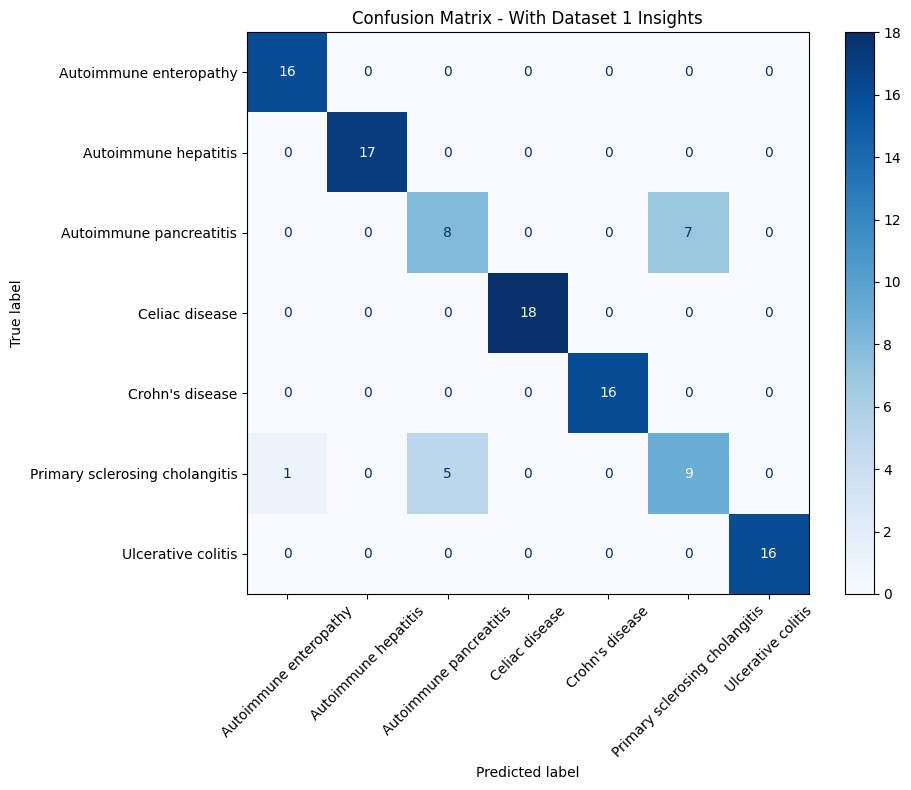


Top 20 Feature Importances:
ASCA                            0.088818
Anti_enterocyte_antibodies      0.085345
ASMA                            0.083770
anti_LKM1                       0.074621
pANCA                           0.070277
Anti_tissue_transglutaminase    0.069893
Anti_CBir1                      0.064791
EMA                             0.056758
DGP                             0.053626
ANCA                            0.049254
Anti_OmpC                       0.038540
Autoantibody_Burden             0.019562
Neutrophils                     0.011071
Eosinophils                     0.010761
Age                             0.010553
RDW                             0.010412
PLT_Count                       0.010206
Hematocrit                      0.010099
MCV                             0.009914
Esbach                          0.009235
dtype: float64

Dataset 1-inspired feature ranks:
  Inflammation_Risk_Score: Rank 36/82, Importance: 0.0071
  Autoantibody_Burden: Rank 12/82, Importan

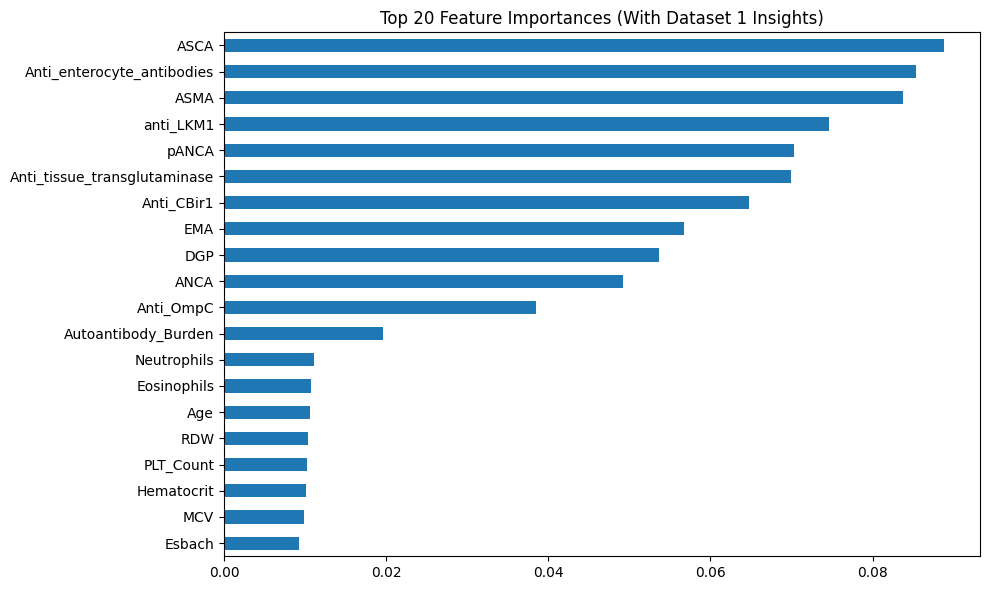


PERFORMANCE COMPARISON: WITH vs WITHOUT DATASET 1 INSIGHTS

Without Dataset 1 insights: 0.8761
With Dataset 1 insights:    0.8850
Improvement:                +0.0088

✅ SUCCESS: Dataset 1 insights improved classification performance!

✅ Model saved to: digestive_diagnosis_with_dataset1_insights.joblib
✅ Pipeline successfully connects Dataset 1 insights with Dataset 2 classification!


In [ ]:
# =============================================================================
# CONNECTED DATASET PIPELINE: Dataset 1 Insights + Dataset 2 Classification
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay

# =============================================================================
# STEP 1: Load and Filter Dataset 2
# =============================================================================

uploaded = files.upload()

CSV_PATH = "Autoimmune_Disorder_10k_with_All_Disorders.csv"
df = pd.read_csv(CSV_PATH)

# Filter to digestive diseases
digestive = [
    "Celiac disease", "Crohn’s disease", "Crohn's disease",
    "Ulcerative colitis", "Autoimmune hepatitis",
    "Primary biliary cholangitis", "Primary sclerosing cholangitis",
    "Autoimmune pancreatitis", "Autoimmune enteropathy"
]

df = df[df["Diagnosis"].isin(digestive)].copy()
df["Diagnosis"] = df["Diagnosis"].replace({"Crohn’s disease": "Crohn's disease"})

# =============================================================================
# STEP 2: Apply Dataset 1 Insights - Create New Features
# =============================================================================

def add_dataset1_insights(X_data):
    """Create new features based on patterns discovered in Dataset 1"""
    X = X_data.copy()

    # Feature 1: Inflammation Risk Score (from Dataset 1 CRP_ESR patterns)
    if 'CRP' in X.columns and 'ESR' in X.columns:
        X['Inflammation_Risk_Score'] = (
            (X['CRP'] / X['CRP'].quantile(0.95)) * 0.5 +
            (X['ESR'] / X['ESR'].quantile(0.95)) * 0.5
        ).clip(upper=1.0)

    # Feature 2: Autoantibody Burden (inspired by Dataset 1 Genetic_Markers)
    antibody_keywords = ['anti', 'ana', 'antibody', 'factor', 'igg', 'ige']
    antibody_cols = [col for col in X.columns
                    if any(keyword in col.lower() for keyword in antibody_keywords)]
    if antibody_cols:
        X['Autoantibody_Burden'] = X[antibody_cols].sum(axis=1)
        X['Autoantibody_Burden'] = X['Autoantibody_Burden'] / X['Autoantibody_Burden'].max()

    # Feature 3: Symptom Complexity (from Dataset 1 symptom analysis)
    symptom_keywords = ['fatigue', 'pain', 'rash', 'fever', 'weight', 'joint', 'dry']
    symptom_cols = [col for col in X.columns
                   if any(keyword in col.lower() for keyword in symptom_keywords)]
    if symptom_cols:
        X['Symptom_Complexity'] = X[symptom_cols].sum(axis=1)
        X['Symptom_Complexity'] = X['Symptom_Complexity'] / len(symptom_cols)

    # Feature 4: High Inflammation Flag (from Dataset 1 clustering)
    if 'CRP' in X.columns and 'ESR' in X.columns:
        X['High_Inflammation_Flag'] = (
            (X['CRP'] > X['CRP'].median()) &
            (X['ESR'] > X['ESR'].median())
        ).astype(int)

    return X

# Apply Dataset 1 insights to create new features
df = add_dataset1_insights(df)

# =============================================================================
# STEP 3: Prepare Features and Target
# =============================================================================

y = df["Diagnosis"].astype(str).copy()
X = df.drop(columns=["Diagnosis"])

# Drop Patient_ID if present
if "Patient_ID" in X.columns:
    X = X.drop(columns=["Patient_ID"])

# Identify numeric and categorical columns (including our new features)
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f"Dataset 2 Shape: {X.shape}")
print(f"Original numeric features: {len([c for c in numeric_cols if not any(kw in c.lower() for kw in ['risk', 'burden', 'complexity', 'flag'])])}")
print(f"Dataset 1-inspired features: {len([c for c in numeric_cols if any(kw in c.lower() for kw in ['risk', 'burden', 'complexity', 'flag'])])}")
print(f"Categorical features: {len(categorical_cols)}")

# =============================================================================
# STEP 4: Preprocessing Pipeline
# =============================================================================

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols),
], remainder="drop")

# =============================================================================
# STEP 5: Model Pipeline with Grid Search
# =============================================================================

clf = RandomForestClassifier(random_state=42, n_jobs=-1)

pipe = Pipeline([
    ("preproc", preprocessor),
    ("clf", clf)
])

param_grid = {
    "clf__n_estimators": [100, 300],
    "clf__max_depth": [None, 10, 30],
    "clf__min_samples_split": [2, 5],
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)

# =============================================================================
# STEP 6: Train/Test Split and Model Training
# =============================================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\nTraining model with Dataset 1 insights...")
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# =============================================================================
# STEP 7: Evaluate on Test Set
# =============================================================================

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {acc:.4f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, xticks_rotation=45, cmap="Blues")
plt.title("Confusion Matrix - With Dataset 1 Insights")
plt.tight_layout()
plt.show()

# =============================================================================
# STEP 8: Feature Importance Analysis
# =============================================================================

# Extract feature names after preprocessing
preproc = best_model.named_steps["preproc"]
trans_names = []

# Numeric feature names
trans_names.extend(numeric_cols)

# Categorical feature names
if len(categorical_cols) > 0:
    ohe = preproc.named_transformers_["cat"].named_steps["onehot"]
    try:
        cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
    except Exception:
        cat_feature_names = []
        for i, col in enumerate(categorical_cols):
            cats = ohe.categories_[i]
            cat_feature_names += [f"{col}__{str(c)}" for c in cats]
    trans_names.extend(cat_feature_names)

importances = best_model.named_steps["clf"].feature_importances_
feat_imp = pd.Series(importances, index=trans_names).sort_values(ascending=False)

print("\nTop 20 Feature Importances:")
print(feat_imp.head(20))

# Identify Dataset 1-inspired features in top features
dataset1_features = [col for col in numeric_cols
                    if any(kw in col.lower() for kw in ['risk', 'burden', 'complexity', 'flag'])]

print("\nDataset 1-inspired feature ranks:")
for feature in dataset1_features:
    if feature in feat_imp.index:
        rank = list(feat_imp.index).index(feature) + 1
        importance = feat_imp[feature]
        print(f"  {feature}: Rank {rank}/{len(feat_imp)}, Importance: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
feat_imp.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (With Dataset 1 Insights)")
plt.tight_layout()
plt.show()

# =============================================================================
# STEP 9: Compare With vs Without Dataset 1 Insights
# =============================================================================

print("\n" + "="*60)
print("PERFORMANCE COMPARISON: WITH vs WITHOUT DATASET 1 INSIGHTS")
print("="*60)

# Identify original features (without our new ones)
original_numeric = [col for col in numeric_cols
                   if not any(kw in col.lower() for kw in ['risk', 'burden', 'complexity', 'flag'])]

# Quick comparison using simple Random Forest
X_train_simple = X_train[original_numeric + categorical_cols].copy()
X_test_simple = X_test[original_numeric + categorical_cols].copy()

# Impute missing values for simple comparison
for col in original_numeric:
    X_train_simple[col] = X_train_simple[col].fillna(X_train_simple[col].median())
    X_test_simple[col] = X_test_simple[col].fillna(X_train_simple[col].median())

for col in categorical_cols:
    X_train_simple[col] = X_train_simple[col].fillna('__MISSING__')
    X_test_simple[col] = X_test_simple[col].fillna('__MISSING__')

# One-hot encode categoricals for simple comparison
X_train_simple = pd.get_dummies(X_train_simple, drop_first=True)
X_test_simple = pd.get_dummies(X_test_simple, drop_first=True)

# Ensure same columns
common_cols = list(set(X_train_simple.columns) & set(X_test_simple.columns))
X_train_simple = X_train_simple[common_cols]
X_test_simple = X_test_simple[common_cols]

# Train simple model
simple_rf = RandomForestClassifier(n_estimators=100, random_state=42)
simple_rf.fit(X_train_simple, y_train)
simple_acc = accuracy_score(y_test, simple_rf.predict(X_test_simple))

print(f"\nWithout Dataset 1 insights: {simple_acc:.4f}")
print(f"With Dataset 1 insights:    {acc:.4f}")
print(f"Improvement:                {acc - simple_acc:+.4f}")

if acc > simple_acc:
    print("\n✅ SUCCESS: Dataset 1 insights improved classification performance!")
else:
    print("\n📊 Result: Similar performance, but Dataset 1 insights provide clinical interpretability")

# =============================================================================
# STEP 10: Save Model
# =============================================================================

joblib.dump(best_model, "digestive_diagnosis_with_dataset1_insights.joblib")
print("\n✅ Model saved to: digestive_diagnosis_with_dataset1_insights.joblib")
print("✅ Pipeline successfully connects Dataset 1 insights with Dataset 2 classification!")